In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# Data Loading

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Data Cleaning

In [4]:
df.describe().round(2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [5]:
df.describe(include="O")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,849-09-3807,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


# Data Cleaning

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
# Transforming Data type of a column
df.Date = pd.to_datetime(df.Date)
df.Date

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [9]:
# Dropping Unnecessary Columns
df.drop(['Time'], axis=1, inplace=True)

In [10]:
# Dropping Unnecessary Columns
df.drop(['gross margin percentage'], axis=1, inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

## For Categorical Columns

In [12]:
catcol = df.select_dtypes(include= "O")
catcol.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet


In [13]:
for col in catcol:
    print(f"Name of the column: {col}")
    print(f"has number of {df[col].nunique()} unique values")
    print(f"those values are {df[col].unique()}")
    print("_"* 50)

Name of the column: Invoice ID
has number of 1000 unique values
those values are ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-24

## For Numeric Columns

In [14]:
# Checking for Numeric Columns
numcols = df.select_dtypes(include=['int', 'float']).columns
numcols

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
for num in numcols:
    px.histogram(data_frame=df, x=num).show()

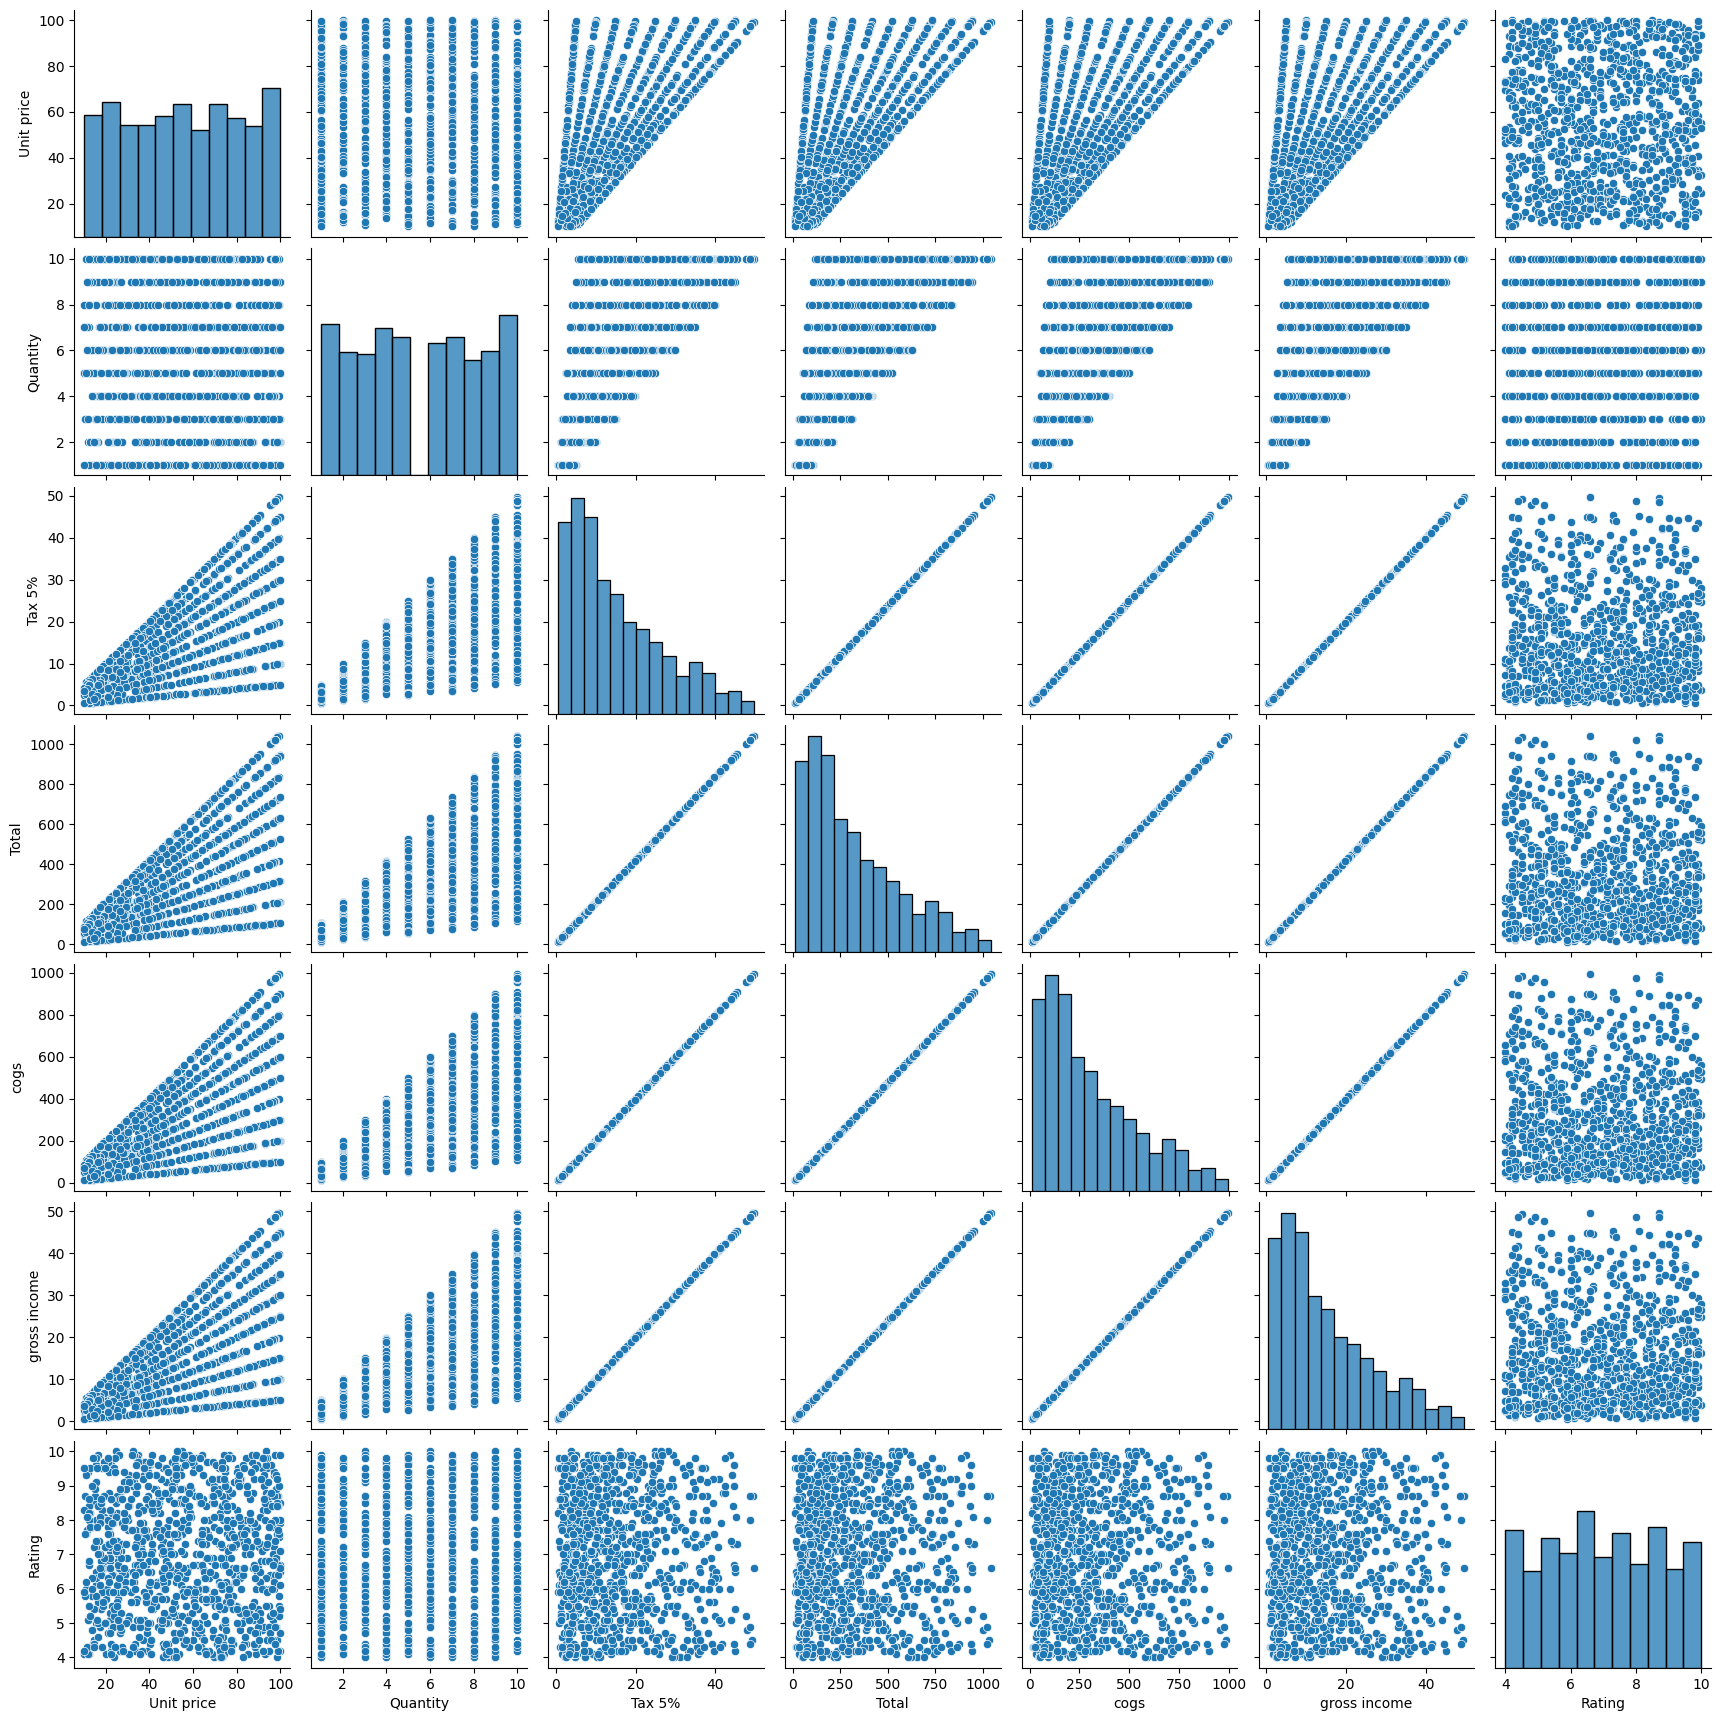

In [16]:
sns.pairplot(df[numcols])

In [17]:
# Checking for Numeric Columns
numcols = df.select_dtypes(include=['int', 'float']).columns
numcols

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating'],
      dtype='object')

# Data Analysis
- Sales Performance By Branch and City
- Gender Based spending
- Customer type Analysis by Gender
- Top Product line Popularity by Total Sales
- Payment Method Trends

In [18]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment', 'cogs', 'gross income', 'Rating'],
      dtype='object')

### Sales Performance By Branch and City

In [55]:
SPBB = df.groupby(["Branch", "City"])['Total'].sum().sort_values(ascending=False).reset_index().round(2)
SPBB

,Branch,City,Total
0,C,Naypyitaw,110568.71
1,A,Yangon,106200.37
2,B,Mandalay,106197.67


In [54]:
px.sunburst(data_frame=SPBB, path=['Branch', 'City'],  title="Cost of Goods Sold by Branch and City", color='Total')

In [21]:
px.histogram(data_frame=SPBB, x='Branch', y="Total", color="City")

### Gender Based Spending

In [22]:
GBS = df.groupby("Gender")['Total'].sum().reset_index().round(2)
GBS

,Gender,Total
0,Female,167882.92
1,Male,155083.82


In [100]:
px.bar(data_frame=GBS,  x='Total', y='Gender', color='Gender')

### Customer Type Analysis by Gender

In [24]:
CTAG = df.groupby(["Customer type", "Gender"])['Total'].sum().reset_index().round(2)
CTAG

,Customer type,Gender,Total
0,Member,Female,88146.94
1,Member,Male,76076.50
2,Normal,Female,79735.98
3,Normal,Male,79007.32


In [75]:
px.bar(data_frame=CTAG, x='Gender', y='Total', color='Customer type', title="Customer Type Analysis by Gender", text_auto=True, barmode='group')

### Top Product line Popularity by Total Sales

In [26]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment', 'cogs', 'gross income', 'Rating'],
      dtype='object')

In [27]:
PLP = df.groupby("Product line")['Total'].sum().sort_values(ascending=False).reset_index().round(2)
PLP

,Product line,Total
0,Food and beverages,56144.84
1,Sports and travel,55122.83
2,Electronic accessories,54337.53
3,Fashion accessories,54305.90
4,Home and lifestyle,53861.91
5,Health and beauty,49193.74


In [ ]:
px.bar(data_frame=PLP, x='Product line', y='Total', title="Top Product line Popularity", text_auto=True)

### Payment Method Trends

In [42]:
PMT = df.groupby('Payment')['Total'].sum().sort_values(ascending=False).reset_index().round(2)
PMT

,Payment,Total
0,Cash,112206.57
1,Ewallet,109993.11
2,Credit card,100767.07


In [43]:
px.pie(data_frame=PMT, values="Total", names="Payment")

### Traffic on Days of the week that achieve highest sales

In [31]:
# Creating column of day name 
df['Day'] = df.Date.dt.day_name()
df['Day']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Day, Length: 1000, dtype: object

In [32]:
DWS = df.groupby('Day')['Total'].sum().sort_values(ascending=False).reset_index().round(2)
DWS

,Day,Total
0,Saturday,56120.81
1,Tuesday,51482.25
2,Thursday,45349.25
3,Sunday,44457.89
4,Friday,43926.34
5,Wednesday,43731.14
6,Monday,37899.08


In [94]:
px.bar(data_frame=DWS, x='Day', y='Total', title="Traffic on Days of the week that achieve highest sales")

### Traffic over time by total sales (to Identify if there's any peaks)

In [34]:
DBV = df.groupby(["Date"])['Total'].sum().sort_values(ascending=False).reset_index().round(2)
DBV

,Date,Total
0,2019-03-09,7474.05
1,2019-02-07,7228.21
2,2019-03-14,7214.63
3,2019-02-15,6830.79
4,2019-03-02,6560.31
...,...,...
84,2019-02-18,1496.03
85,2019-03-07,1438.26
86,2019-02-21,1393.74
87,2019-03-18,1292.83


In [35]:
px.scatter(data_frame=DBV, x="Date", y='Total', size="Total", title="Traffic over time by total sales to identify peaks")

### AVG Quantity purchased per transaction, broken down by product line

In [36]:
AVGBP = df.groupby("Product line")["Total"].mean().sort_values(ascending=False).reset_index().round(2)
AVGBP

,Product line,Total
0,Home and lifestyle,336.64
1,Sports and travel,332.07
2,Health and beauty,323.64
3,Food and beverages,322.67
4,Electronic accessories,319.63
5,Fashion accessories,305.09


In [58]:
px.histogram(data_frame=AVGBP, x="Product line", y="Total", title="AVG Quantity purchased per transaction, broken down by product line")

### Correlation

In [86]:
corrdf = df.corr(numeric_only=True).round(2)
corrdf

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
gross income,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,-0.04,1.00


In [97]:
px.imshow(corrdf, height=600, width=1200, text_auto=True, title="Correlation Between Numeric Columns")

In [91]:
# Saving Cleaned dataframe into a new csv
df.to_csv("cleaned_supermarket_sales.csv", index=False)

# Deployment

In [107]:
%%writefile SuperMarket.py

import streamlit as st
import pandas as pd
import plotly.express as px

# Set Page Layout
st.set_page_config(page_title="SuperMarket Analysis Deployment", page_icon="🛒")

df = pd.read_csv("cleaned_supermarket_sales.csv")
st.dataframe(df.head())


page = st.sidebar.radio('Pages', ['Univariate Analysis', "Bivariate Analysis", "Multivariate Analysis"])

if page == "Univariate Analysis":
    chart = st.selectbox("Select Chart", ["Histogram", "Pie"])

    if chart == "Histogram":
        st.plotly_chart(px.histogram(data_frame=df.groupby("Product line")["Total"].mean().sort_values(ascending=False).reset_index().round(2),
        x="Product line", y="Total", title="AVG Quantity purchased per transaction, broken down by product line")
        ,key="Histogram_Chart")
    
    elif chart == "Pie":
        st.plotly_chart(px.pie(data_frame=df.groupby('Payment')['Total'].sum().sort_values(ascending=False).reset_index().round(2), values="Total",
        names="Payment"), key="Pie_chart")

elif page == "Bivariate Analysis":

    chart = st.selectbox("Select Chart", ["Heatmap", "Scatterplot", "Bar"])

    if chart == "Heatmap":
        st.plotly_chart(px.imshow(df.corr(numeric_only=True).round(2), height=600, width=1200, text_auto=True))

    elif chart == "Scatterplot":
        st.plotly_chart(px.scatter(data_frame=df.groupby(["Date"])['Total'].sum().sort_values(ascending=False).reset_index().round(2),
        x="Date", y='Total', size="Total", title="Traffic over time by total sales to identify peaks"))

    elif chart == "Bar":
        st.plotly_chart(px.bar(data_frame=df.groupby('Day')['Total'].sum().sort_values(ascending=False).reset_index().round(2),
        x='Day', y='Total', title="Traffic on Days of the week that achieve highest sales"), title="Correlation Between Numeric Columns")

elif page == "Multivariate Analysis":

    chart = st.selectbox("Select Chart", ["SunBurst", "Bar"])



    if chart == "Bar":
        st.plotly_chart(px.bar(data_frame=df.groupby(["Customer type", "Gender"])['Total'].sum().reset_index().round(2),
    x='Gender', y='Total', color='Customer type', title="Customer Type Analysis by Gender", text_auto=True, barmode='group'))
    
    elif chart == "SunBurst":
        st.plotly_chart(px.sunburst(data_frame=df.groupby(["Branch", "City"])['Total'].sum().sort_values(ascending=False).reset_index().round(2),
    path=['Branch', 'City'],  title="Cost of Goods Sold by Branch and City", color='Total'))


Overwriting SuperMarket.py


# Deployment Page:
https://supermarket-analysis-deployment-4w3hqjwhtg6smhfa4cha38.streamlit.app/